<a href="https://colab.research.google.com/github/akhabhishek/Python-Algorithms-Practice/blob/main/Binary_Heap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Heaps are another category of Trees

- A Binary Heap is very similar to Binary Search Tree, but has some different rules
- Heaps are most commonly used in implementation fo Priority Queues


---


## Max Binary Heap
**(This code implements a max binary heap)**  
- Each parent has at most two child nodes
- Value of any parent node is always **greater** than values of both the child nodes
- All children of each node should be as full as they can be (left children are filled out first)

**Note:** There need not be any order between siblings (unlike Binary Search Tree where left child is smaller and right child is larger)



---


## Min Binary Heap
**(Make necessary changes to the code for min binary heap - look for comments with dashed line)**  
  
This has same properties as Max Binary Heap with the below difference:
- Value of any parent node is always **lesser** than values of both the child nodes

## Storing a heap
One way is to create a Node class and create a heap just like we created trees. ***However, there is an easier way to store heaps using lists.***

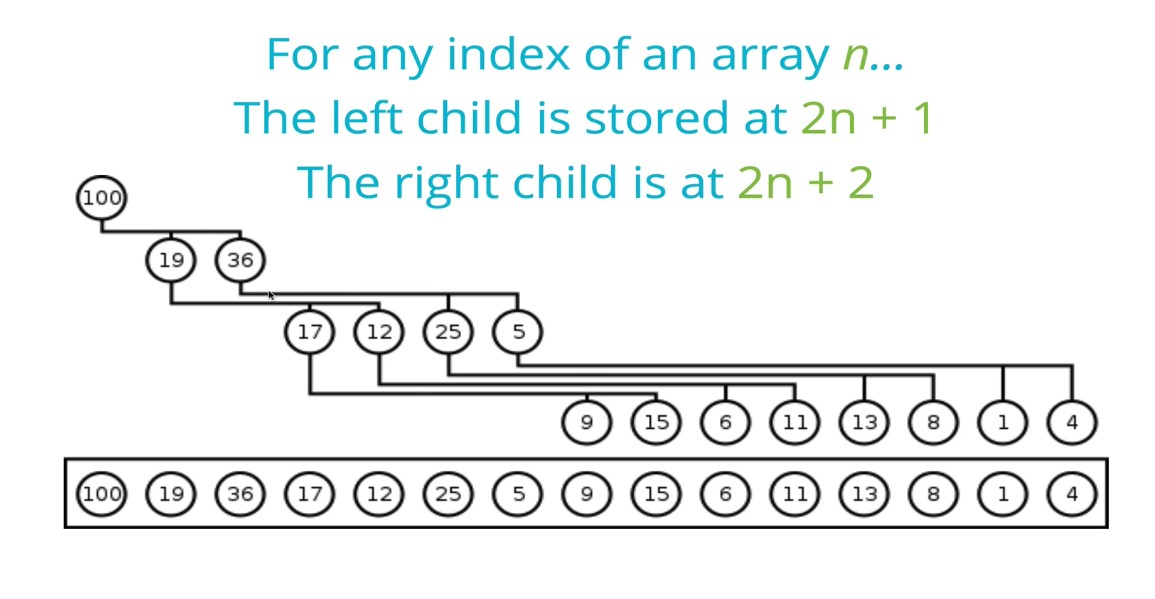

---



And, for any child node at index n, its parent is at index (n-1)/2 floored

## Insert an element to a binary heap
- We add an element to the end of the list and then bubble it up to its correct place in heap (here, 55)  
    - [41, 39, 33, 18, 27, 12, **55**]  
- We compare the new element, 55, with its parent, 33 ((n-1)/2). If new element is larger, swap it with parent  
    - [41, 39, **55**, 18, 27, 12, **33**]  
- Now compare 55 with its new parent, 41. We swap again as 55 > 41  
    - [**55**, 39, **41**, 18, 27, 12, 33]  


In heap form, it looks like this:

            41                     41                   55*
        39       33     -->    39       55*   -->   39       41*
      18  27   12  55*       18  27   12  33*     18  27   12  33


## Removing an element from a max binary heap
**Note: Generally, the max element is extracted**

- We extract the max value (root) and replace it with last element of heap (which is also the last element of list)  
    - Original list = [**55**, 39, 41, 18, 27, 12, **33**]
    - Max value extracted = 55
    - [**33**, 39, 41, 18, 27, 12]  
- Now we adjust the heap until the new root value is in its correct place (it sinks down the heap to its correct place)
- We compare the new root, 33, with its left child, 39 (2n+1) and its right child, 41 (2n+2).
- We swap the parent with the larger child
    - [**41**, 39, **33**, 18, 27, 12]  
- Next, we again compare 33 with its new children (12) and swap with larger child; no swap if both children are smaller than parent 
    - This is repeated until 33 is in its correct place   


In heap form, it looks like this:

            55*                    33*                  41*
        39       41     -->    39       41    -->   39       33*
      18  27   12  33*       18  27   12          18  27   12  


In [ ]:
class MaxBinaryHeap:
    def __init__(self):
        self.values = []
    
    def insert(self, new_value):

        # Add at end of array
        self.values.append(new_value)

        if len(self.values) == 1:
            return self.values

        # Set the index of the new value
        new_val_idx = len(self.values) - 1

        while new_val_idx > 0:

            # Set parent index for current index of new value
            parent_idx = (new_val_idx - 1) // 2
            
            # If new value is greater than parent, swap
            if new_value > self.values[parent_idx]: #----------------------------------------------- Use < here for Min Binary Heap
                
                # Swap
                self.values[new_val_idx] = self.values[parent_idx]
                self.values[parent_idx] = new_value

                # If swapped, update  the index of new value to its new position
                new_val_idx = parent_idx

            else:
                return self.values
            
        
        return self.values
     
    def extract_max(self):

        # Exit if no values in heap or return value if only 1 element in heap
        if len(self.values) == 0:
            return "No values in heap!"
        elif len(self.values) == 1:
            return self.values.pop()
        
        # Set the max value of heap to a variable
        max_value = self.values[0]

        # Pop the last element from list and assign it to the place of max value (0 index)
        self.values[0] = self.values.pop()

        parent_idx = 0
        parent = self.values[parent_idx]
        
        while True:

            left_child_idx = (2 * parent_idx) + 1
            right_child_idx = (2 * parent_idx) + 2
            left_child = right_child = None
            swap_idx = None

            # Set left_child if its index is not out of range
            if left_child_idx < len(self.values):
                left_child = self.values[left_child_idx]

                # If left_child > parent, we need to swap parent with left_child (this can change after checking right_child)
                if left_child > parent: #----------------------------------------------- Use < here for Min Binary Heap
                    swap_idx = left_child_idx
            
            # Set right_child if its index is not out of range
            if right_child_idx < len(self.values):
                right_child = self.values[right_child_idx]

                # If right_child > left_child and parent, we will swap parent with right_child
                if (right_child > left_child) and (right_child > parent): #--------------------------- Use < here for Min Binary Heap
                    swap_idx = right_child_idx

            # swap_idx will not be updated if left and right child indices are out of range
            if swap_idx == None:
                break

            self.values[parent_idx] = self.values[swap_idx]
            self.values[swap_idx] = parent

            parent_idx = swap_idx
        
        return max_value

In [ ]:
mbh = MaxBinaryHeap()

In [ ]:
mbh.insert(41)

[41]

In [ ]:
mbh.insert(39)

[41, 39]

In [ ]:
mbh.insert(33)
mbh.insert(18)
mbh.insert(27)
mbh.insert(12)

[41, 39, 33, 18, 27, 12]

In [ ]:
mbh.insert(55)

[55, 39, 41, 18, 27, 12, 33]

In [ ]:
mbh.extract_max()

55

In [ ]:
mbh.values

[41, 39, 33, 18, 27, 12]